# ASSUMPTION

model_name.fittedvalues : Predictions 
model_name.resid : Residuals 
model_name.params: Intercept and Coefficients (b0, b1, b2…etc)
model_name.pvalues: p value of t-test (Ho: The coefficient = 0) 
model_name.conf_int(): Confidence interval estimate for b0, b1, b2…etc

model_name.rsquared : R square
model_name.rsquared_adj: Adjusted R square
model_name.f_pvalue: p value of Anova (using f distribution) (H0: All coef = 0)

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import jarque_bera
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
print('All Libraries are imported')

All Libraries are imported


In [2]:
df_housing=pd.read_csv('hRUoRL.csv')
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X=df_housing.drop('PRICE',axis=1)
y=df_housing['PRICE']

In [4]:
Xc=sm.add_constant(X)

In [5]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        00:06:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
Xc_temp=Xc.drop('AGE',axis=1)
temp_model=sm.OLS(y,Xc_temp).fit()

In [7]:
print('R2 before drop',ols_model.rsquared)
print('Adj R2 before drop',ols_model.rsquared_adj)

R2 before drop 0.7406426641094095
Adj R2 before drop 0.733789726372463


In [8]:
print('R2 after drop',temp_model.rsquared)  # Adj mean  Adjust
print('Adj R2 after drop',temp_model.rsquared_adj)

R2 after drop 0.7406412165505145
Adj R2 after drop 0.7343282238499185


# Assumption-1: No Multicollinearity

<Axes: >

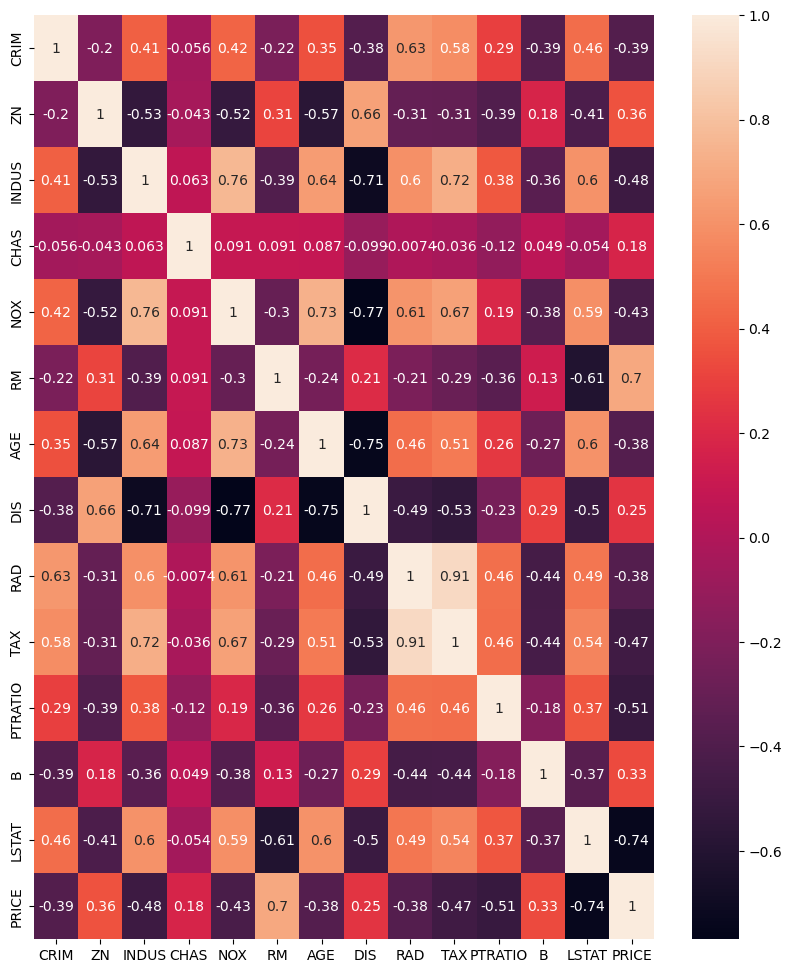

In [9]:
plt.figure(figsize=(10,12))
sns.heatmap(df_housing.corr(),annot=True)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [11]:
Xc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   const    506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
VIF(Xc.values,2)

2.2987581787494418

In [13]:
vif_value=[VIF(Xc.values,i) for i in range(Xc.shape[1])]
pd.DataFrame(vif_value,columns=['VIF_Value'],index=Xc.columns).sort_values('VIF_Value',ascending=False)

,VIF_Value
const,585.265238
TAX,9.008554
RAD,7.484496
NOX,4.393720
INDUS,3.991596
DIS,3.955945
AGE,3.100826
LSTAT,2.941491
ZN,2.298758
RM,1.933744


# Assumption-2: Linear Realtionship

In [14]:
ols_model=sm.OLS(y,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        00:06:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
y_pred=ols_model.fittedvalues
residuals=ols_model.resid

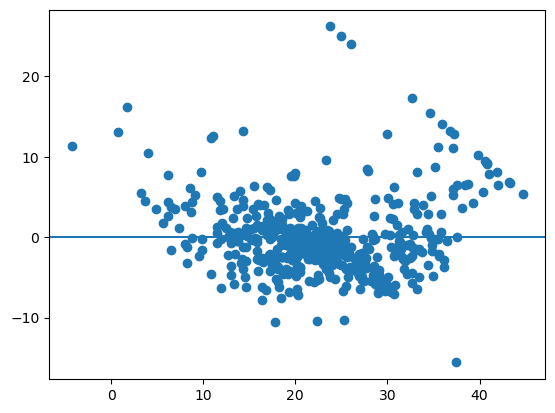

In [16]:
plt.scatter(y_pred,residuals)
plt.axhline(0)

# Assumption-3 No Autocorrelation

In [17]:
from statsmodels.stats.api import durbin_watson
durbin_watson(residuals)

1.0783751186797235

# Assumption-4: Homoskedasticity (No Heterokedasticity)

In [18]:
from statsmodels.stats.api import het_breuschpagan
het_breuschpagan(residuals,Xc)[2:] #Teststat ,pvalue

(5.590226641705057, 1.4957755130729886e-09)

# Assumption-5: Normality of Residuals

<Axes: ylabel='Density'>

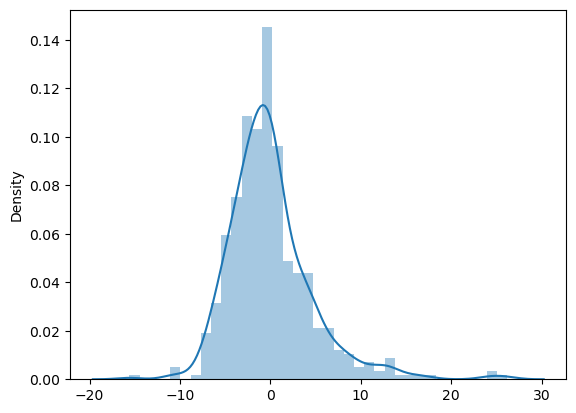

In [19]:
sns.distplot(residuals)

In [23]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.9013806581497192, pvalue=1.480177833053824e-17)

In [24]:
jarque_bera(residuals)

SignificanceResult(statistic=783.1262780507673, pvalue=8.836685621030912e-171)

In [25]:
from statsmodels.stats.api import jarque_bera
test_stat,p_value,res_skew,res_kurt=jarque_bera(residuals)
p_value

8.836685621030912e-171

<Axes: xlabel='PRICE', ylabel='Density'>

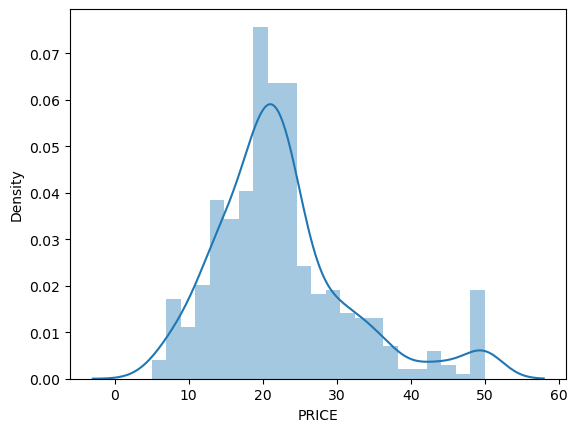

In [26]:
sns.distplot(y)

<Axes: xlabel='PRICE', ylabel='Density'>

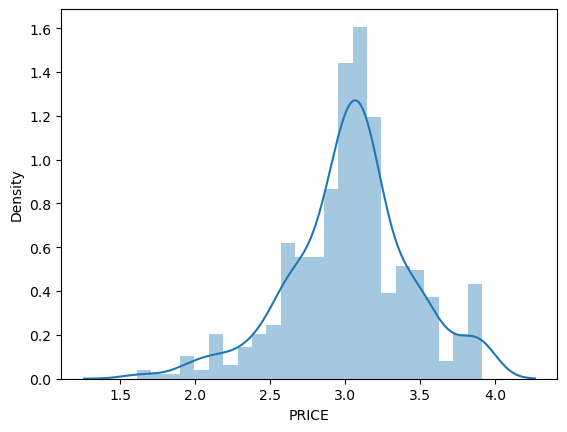

In [27]:
logy=np.log(y)
sns.distplot(logy)

In [28]:
y.skew()

1.1080984082549072

In [29]:
logy.skew()

-0.33032129530987864

In [30]:
ols_model=sm.OLS(logy,Xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          4.07e-157
Time:                        00:07:52   Log-Likelihood:                 129.61
No. Observations:                 506   AIC:                            -231.2
Df Residuals:                     492   BIC:                            -172.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1020      0.204     20.081      0.000       3.701       4.503
CRIM          -0.0103      0.001     -7.808      0.000      -0.013      -0.008
ZN             0.0012      0.001      2.134      0.033    9.29e-05       0.002
INDUS          0.0025      0.002      1.002      0.317      -0.002       0.007
CHAS           0.1009      0.034      2.925      0.004       0.033       0.169
NOX           -0.7784      0.153     -5.091      0.000      -1.079      -0.478
RM             0.0908      0.017      5.430      0.000       0.058       0.124
AGE            0.0002      0.001      0.398      0.691      -0.001       0.001
DIS           -0.0491      0.008     -6.149      0.000      -0.065      -0.033
RAD            0.0143      0.003      5.373      0.000       0.009       0.019
TAX           -0.0006      0.000     -4.157      0.000      -0.001      -0.000
PTRATIO       -0.0383      0.005     -7.309      0.000      -0.049      -0.028
B              0.0004      0.000      3.847      0.000       0.000       0.001
LSTAT         -0.0290      0.002    -14.304      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       59.863   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.459
Skew:                           0.466   Prob(JB):                     4.06e-50
Kurtosis:                       6.150   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Density'>

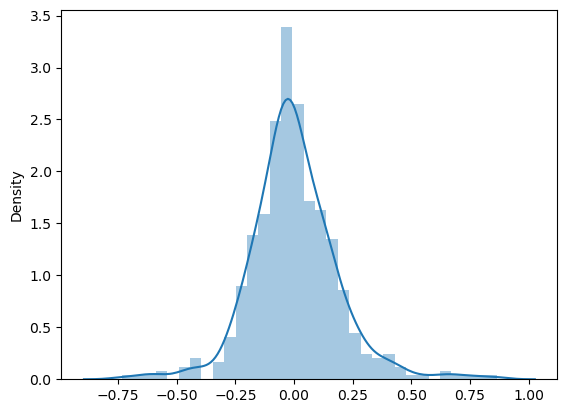

In [31]:
residuals=ols_model.resid
sns.distplot(residuals)

In [36]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.9517022371292114, pvalue=8.417074329192253e-12)

In [38]:
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
print(residuals)

0      -5.098264
1      -2.902275
2       3.472574
3       3.692896
4       6.635204
         ...    
501    -3.270701
502    -2.716942
503    -5.934355
504    -6.147705
505   -11.142319
Length: 506, dtype: float64


In [40]:
stats.shapiro(residuals)

ShapiroResult(statistic=0.8770668506622314, pvalue=1.3768426465823974e-19)

In [34]:
for i in range(1,6):
    print(i,i**3,5+2*(i**3),sep='\t')

1	1	7
2	8	21
3	27	59
4	64	133
5	125	255
